In [2]:
!pip install dlib


You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install scipy

You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install face_recognition

You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install pip install matplotlib

^C


You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install IPython

You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install requests

You should consider upgrading via the 'c:\users\pichau\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Foto capturada e salva como 'photo.jpg'


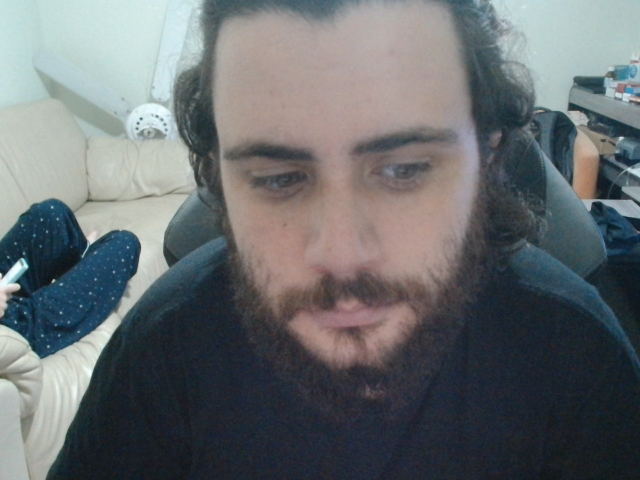

In [ ]:
import cv2
from IPython.display import display, clear_output
from PIL import Image
import time  # Importar a biblioteca de tempo

# Função para capturar uma única imagem da câmera do computador e salvá-la como 'photo.jpg'
def capturar_uma_imagem():
    cap = cv2.VideoCapture(0)  # 0 é geralmente o índice da primeira câmera
    try:
        if not cap.isOpened():
            raise IOError("Não é possível abrir a webcam")


        ret, frame = cap.read()
        if not ret:
            raise IOError("Não é possível capturar a imagem")
        
        # Convertendo o frame capturado, que está no formato BGR para o formato RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame)
        
        # Salvar a imagem como photo.jpg
        img.save('photo.jpg')
        print("Foto capturada e salva como 'photo.jpg'")
        
        # Exibindo a imagem no Jupyter Notebook
        display(img)
        
    finally:
        cap.release()
        cv2.destroyAllWindows()

# Chamada da função para captura e exibição da imagem
capturar_uma_imagem()


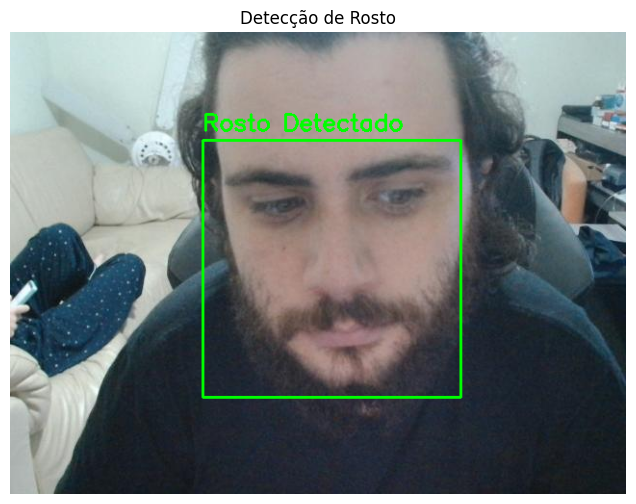

In [7]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

# Carregar a imagem e detectar as localizações dos rostos
caminho_imagem = 'photo.jpg'
imagem = face_recognition.load_image_file(caminho_imagem)
locais_rostos = face_recognition.face_locations(imagem)

# Carregar a imagem com o OpenCV para manipulação
imagem_cv = cv2.imread(caminho_imagem)

# Desenhar retângulos e texto ao redor de cada rosto detectado
for (topo, direita, fundo, esquerda) in locais_rostos:
    # Desenhar um retângulo ao redor do rosto
    cv2.rectangle(imagem_cv, (esquerda, topo), (direita, fundo), (0, 255, 0), 2)
    # Colocar texto acima do retângulo
    cv2.putText(imagem_cv, "Rosto Detectado", (esquerda, topo - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Converter de BGR para RGB para exibição
imagem_cv_rgb = cv2.cvtColor(imagem_cv, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(8, 6))  # Tamanho da figura
plt.imshow(imagem_cv_rgb) 
plt.title('Detecção de Rosto')  # Título da figura
plt.axis('off')  # Desligar os eixos
plt.show()  # Exibir a figura


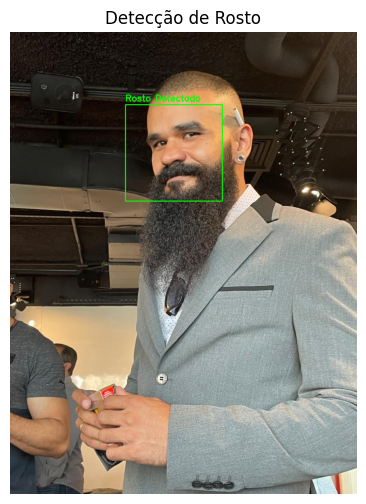

In [8]:
# Carregar a imagem e detectar as localizações dos rostos
caminho_imagem = 'photo2.jpg'
imagem = face_recognition.load_image_file(caminho_imagem)
locais_rostos = face_recognition.face_locations(imagem)

# Carregar a imagem com o OpenCV para manipulação
imagem_cv = cv2.imread(caminho_imagem)

# Desenhar retângulos e texto ao redor de cada rosto detectado
for (topo, direita, fundo, esquerda) in locais_rostos:
    # Desenhar um retângulo ao redor do rosto
    cv2.rectangle(imagem_cv, (esquerda, topo), (direita, fundo), (0, 255, 0), 2)
    # Colocar texto acima do retângulo
    cv2.putText(imagem_cv, "Rosto Detectado", (esquerda, topo - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Converter de BGR para RGB para exibição
imagem_cv_rgb = cv2.cvtColor(imagem_cv, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(8, 6))  # Tamanho da figura
plt.imshow(imagem_cv_rgb) 
plt.title('Detecção de Rosto')  # Título da figura
plt.axis('off')  # Desligar os eixos
plt.show()  # Exibir a figura


In [9]:
# Carregar imagens conhecidas e criar codificações
codificacoes_conhecidas_faces = []
nomes_conhecidos_faces = []

# Adicionar cada pessoa conhecida
imagens_conhecidas = ["photo.jpg", "photo2.jpg"]  # Lista dos arquivos de imagens das pessoas conhecidas
nomes_conhecidos = ["Felipe", "Fabio"]  # Nomes correspondentes às imagens

for caminho_imagem, nome in zip(imagens_conhecidas, nomes_conhecidos):
    imagem = face_recognition.load_image_file(caminho_imagem)
    codificacoes = face_recognition.face_encodings(imagem)
    if codificacoes:
        codificacoes_conhecidas_faces.append(codificacoes[0])
        nomes_conhecidos_faces.append(nome)

In [15]:
# Função para processar e mostrar imagem
def processar_e_mostrar_imagem(caminho_imagem):
    imagem_alvo = face_recognition.load_image_file(caminho_imagem)
    localizacoes_faces_alvo = face_recognition.face_locations(imagem_alvo)
    codificacoes_faces_alvo = face_recognition.face_encodings(imagem_alvo, localizacoes_faces_alvo)

    # Converter a imagem alvo para RGB
    imagem_alvo_cv = cv2.cvtColor(imagem_alvo, cv2.COLOR_BGR2RGB)

    # Tentar identificar cada rosto na imagem alvo
    for (topo, direita, fundo, esquerda), codificacao_face in zip(localizacoes_faces_alvo, codificacoes_faces_alvo):
        correspondencias = face_recognition.compare_faces(codificacoes_conhecidas_faces, codificacao_face)
        nome = "Desconhecido"

        # Ver se há uma correspondência com alguma face conhecida
        if True in correspondencias:
            indice_primeira_correspondencia = correspondencias.index(True)
            nome = nomes_conhecidos_faces[indice_primeira_correspondencia]

        # Desenhar um retângulo e nome ao redor do rosto
        cv2.rectangle(imagem_alvo_cv, (esquerda, topo), (direita, fundo), (0, 255, 0), 2)
        cv2.putText(imagem_alvo_cv, nome, (esquerda + 6, fundo - 6), cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255), 1)

    # Mostrar a imagem
    plt.figure(figsize=(10, 14))
    plt.imshow(imagem_alvo_cv)
    plt.axis("off")
    plt.show()

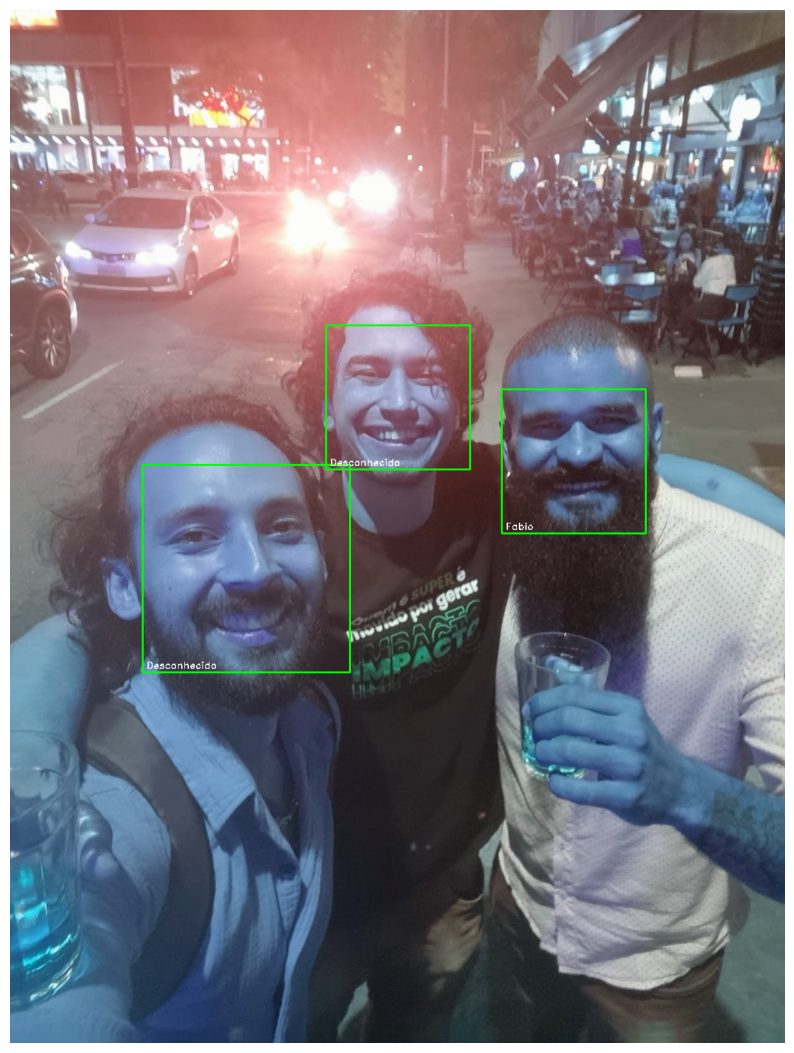

In [16]:
# Processar e mostrar as imagens
processar_e_mostrar_imagem('photo3.jpg')


In [ ]:
import requests
import os

# URL do arquivo shape_predictor_68_face_landmarks.dat
url = "https://github.com/italojs/facial-landmarks-recognition/raw/master/shape_predictor_68_face_landmarks.dat"

# Caminho para salvar o arquivo
file_path = "shape_predictor_68_face_landmarks.dat"

# Baixar o arquivo
response = requests.get(url)
with open(file_path, 'wb') as f:
    f.write(response.content)

# Verificar se o arquivo foi baixado com sucesso
if os.path.exists(file_path):
    print("Arquivo baixado com sucesso:", file_path)
else:
    print("Erro ao baixar o arquivo.")

Arquivo baixado com sucesso: shape_predictor_68_face_landmarks.dat


In [ ]:
import dlib
import numpy as np
from scipy.spatial import distance as dist

def razao_aspecto_olho(olho):
    # Marcos verticais
    A = dist.euclidean(olho[1], olho[5])
    B = dist.euclidean(olho[2], olho[4])

    # Marco horizontal
    C = dist.euclidean(olho[0], olho[3])

    # Calcular EAR
    ear = (A + B) / (2.0 * C)
    return ear

# Carregar o preditor
p = "shape_predictor_68_face_landmarks.dat"  # Certifique-se de ter esse arquivo de dados do preditor
detector = dlib.get_frontal_face_detector()
preditor = dlib.shape_predictor(p)

# Iniciar a captura de vídeo
cap = cv2.VideoCapture(0)

# Limiar para EAR abaixo do qual o olho é considerado fechado
EAR_THRESH = 0.3
frames_fechados = 0
frames_consecutivos = 3  # Número de frames para considerar um piscar

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = preditor(gray, face)

        # Obter as coordenadas para o olho esquerdo e direito
        olho_esquerdo = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)])
        olho_direito = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)])

        # Calcular EAR para ambos os olhos
        ear_esquerdo = razao_aspecto_olho(olho_esquerdo)
        ear_direito = razao_aspecto_olho(olho_direito)

        # Média do EAR
        ear = (ear_esquerdo + ear_direito) / 2.0

        # Verificar por piscadas
        if ear < EAR_THRESH:
            frames_fechados += 1
        else:
            if frames_fechados >= frames_consecutivos:
                print("Piscada detectada!")
                frames_fechados = 0
            else:
                frames_fechados = 0

cap.release()
cv2.destroyAllWindows()


Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!
Piscada detectada!


: 